In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Function to compute the two-norm error
def compute_error(obtained_value, true_value):
    return np.linalg.norm(obtained_value - true_value)

In [3]:
# Hill Climber Method with path tracking and iteration counting
def hill_climber(f, x0, step_size=0.01, max_iter=1000):
    x = np.array(x0)
    best_val = f(*x)
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    
    for i in tqdm(range(max_iter), desc="Hill Climber Progress"):
        # Generate a random perturbation
        perturbation = np.random.uniform(-step_size, step_size, size=x.shape)
        new_x = x + perturbation
        new_val = f(*new_x)
        func_evals += 1
        
        # If the new point is better, move to it
        if new_val < best_val:
            x = new_x
            best_val = new_val
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress every 100 iterations
        if i % 100 == 0 or i == max_iter - 1:
            print(f"Iteration {i}: Best Value = {best_val}, Current Point = {x}")
    
    return x, best_val, np.array(path), func_evals

In [4]:
# Gradient Descent with Wolfe Conditions, path tracking and iteration counting
def gradient_descent_wolfe(f, grad_f, x0, t=1.0, c1=1e-4, c2=0.9, max_iter=20):
    x = np.array(x0)
    max_wolfe_iter = max_iter
    initial_t = t
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    grad_evals = 1  # Initial gradient evaluation
    
    def wolfe_conditions(t, grad, direction):
        return (f(*(x + t * direction)) <= f(*x) + c1 * t * np.dot(grad, direction)) and \
               (np.dot(grad_f(*(x + t * direction)), direction) >= c2 * np.dot(grad, direction))
    
    for i in tqdm(range(max_iter), desc="Gradient Descent Progress"):
        grad = grad_f(*x)
        grad_evals += 1
        direction = -grad
        wolfe_iter = 0
        t = initial_t
        
        # Step size control using Wolfe conditions
        while not wolfe_conditions(t, grad, direction) and wolfe_iter < max_wolfe_iter:
            if f(*(x + t * direction)) > f(*x) + c1 * t * np.dot(grad, direction):
                t *= 0.5
            elif np.dot(grad_f(*(x + t * direction)), direction) < c2 * np.dot(grad, direction):
                t *= 2.0
            else:
                break
            wolfe_iter += 1
            func_evals += 1
        
        x = x + t * direction
        func_evals += 1
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress
        if i % 10 == 0 or i == max_iter - 1:
            print(f"Iteration {i}: Current Value = {f(*x)}, Current Point = {x}")
        
        # Check for stopping criterion
        if np.linalg.norm(grad) < 1e-8:
            break
    
    return x, f(*x), np.array(path), func_evals, grad_evals

In [5]:
# Newton's Method with path tracking, iteration counting, and stopping criterion
def newton_method(f, grad_f, hess_f, x0, max_iter=20):
    x = np.array(x0)
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    grad_evals = 1  # Initial gradient evaluation
    hess_evals = 1  # Initial Hessian evaluation
    
    for i in tqdm(range(max_iter), desc="Newton Method Progress"):
        grad = grad_f(*x)
        hess = hess_f(*x)
        grad_evals += 1
        hess_evals += 1
        
        # Solve for the search direction
        direction = np.linalg.solve(hess, -grad)
        
        x = x + direction
        func_evals += 1
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress
        if i % 10 == 0 or i == max_iter - 1:
            print(f"Iteration {i}: Current Value = {f(*x)}, Current Point = {x}")
        
        # Check for stopping criterion
        if np.linalg.norm(grad) < 1e-4:
            break
    
    return x, f(*x), np.array(path), func_evals, grad_evals, hess_evals

Testing Hill Climber Method:


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 111116.22it/s]


Iteration 0: Best Value = -105.65920097282425, Current Point = [-4.00837435  4.00518368]
Iteration 100: Best Value = -117.26510162978222, Current Point = [-4.21928633  4.22914204]
Iteration 200: Best Value = -127.07536232599537, Current Point = [-4.45674195  4.33128353]
Iteration 300: Best Value = -135.38179629309042, Current Point = [-4.62576072  4.4437106 ]
Iteration 400: Best Value = -142.49050230511153, Current Point = [-4.8049124   4.49192974]
Iteration 500: Best Value = -152.5579330968969, Current Point = [-5.01536143  4.59993915]
Iteration 600: Best Value = -161.58233579359214, Current Point = [-5.23638973  4.64869827]
Iteration 700: Best Value = -172.3675394314882, Current Point = [-5.45438844  4.74993622]
Iteration 800: Best Value = -183.95658555186037, Current Point = [-5.6312496   4.91392621]
Iteration 900: Best Value = -195.27595901999499, Current Point = [-5.7970926   5.07098965]
Iteration 999: Best Value = -207.8434999565925, Current Point = [-6.01985771  5.18800133]


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 111119.16it/s]


Iteration 0: Best Value = 1.3635065766791525, Current Point = [0.4940982  1.00154697]
Iteration 100: Best Value = -0.3030760844589826, Current Point = [0.30745897 0.80595906]
Iteration 200: Best Value = -0.9697258179627654, Current Point = [0.03213902 0.68391034]
Iteration 300: Best Value = -1.0316172430660109, Current Point = [-0.08828046  0.71302661]
Iteration 400: Best Value = -1.031624357786813, Current Point = [-0.09025519  0.713329  ]
Iteration 500: Best Value = -1.031624357786813, Current Point = [-0.09025519  0.713329  ]
Iteration 600: Best Value = -1.031624357786813, Current Point = [-0.09025519  0.713329  ]
Iteration 700: Best Value = -1.0316265544843364, Current Point = [-0.08935942  0.71227772]
Iteration 800: Best Value = -1.0316265544843364, Current Point = [-0.08935942  0.71227772]
Iteration 900: Best Value = -1.0316265544843364, Current Point = [-0.08935942  0.71227772]
Iteration 999: Best Value = -1.0316265544843364, Current Point = [-0.08935942  0.71227772]


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 124990.43it/s]


Iteration 0: Best Value = 8.0, Current Point = [-2.  2.]
Iteration 100: Best Value = 7.959752255145659, Current Point = [-1.98929792  1.98963551]
Iteration 200: Best Value = 7.959752255145659, Current Point = [-1.98929792  1.98963551]
Iteration 300: Best Value = 7.959682327739504, Current Point = [-1.99012167  1.99015072]
Iteration 400: Best Value = 7.959682327739504, Current Point = [-1.99012167  1.99015072]
Iteration 500: Best Value = 7.959682264135367, Current Point = [-1.98975861  1.98963506]
Iteration 600: Best Value = 7.959682264135367, Current Point = [-1.98975861  1.98963506]
Iteration 700: Best Value = 7.959682264135367, Current Point = [-1.98975861  1.98963506]
Iteration 800: Best Value = 7.959679645329213, Current Point = [-1.99015715  1.98974728]
Iteration 900: Best Value = 7.959679645329213, Current Point = [-1.99015715  1.98974728]
Iteration 999: Best Value = 7.959679645329213, Current Point = [-1.99015715  1.98974728]
Testing Gradient Descent with Wolfe Conditions:


Gradient Descent Progress: 100%|██████████| 20/20 [00:00<00:00, 2499.51it/s]


Iteration 0: Current Value = -65001.3, Current Point = [-100.  100.]
Iteration 10: Current Value = -65001.3, Current Point = [-100.  100.]
Iteration 19: Current Value = -65001.3, Current Point = [-100.  100.]


Gradient Descent Progress: 100%|██████████| 20/20 [00:00<00:00, 2000.29it/s]


Iteration 0: Current Value = 1.1035124149589484, Current Point = [-1.9875  0.75  ]
Iteration 10: Current Value = 0.060061190513864826, Current Point = [-1.56303775  0.89416635]
Iteration 19: Current Value = 0.06029955518089081, Current Point = [-1.56294466  0.89419207]


Gradient Descent Progress:   5%|▌         | 1/20 [00:00<?, ?it/s]


Iteration 0: Current Value = 0.0, Current Point = [-1.53210777e-14  1.53210777e-14]
Testing Newton's Method:


Newton Method Progress:   5%|▌         | 1/20 [00:00<00:00, 90.92it/s]


Iteration 0: Current Value = -1.3, Current Point = [0. 0.]


Newton Method Progress:  10%|█         | 2/20 [00:00<?, ?it/s]


Iteration 0: Current Value = 0.0049039740624900185, Current Point = [-0.13483146  1.00842697]


Newton Method Progress:  10%|█         | 2/20 [00:00<00:00, 2002.05it/s]

Iteration 0: Current Value = 7.959662398985785, Current Point = [-1.98991895  1.98991895]


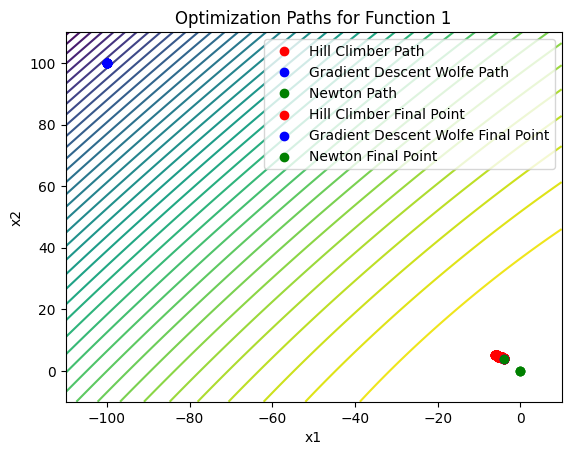

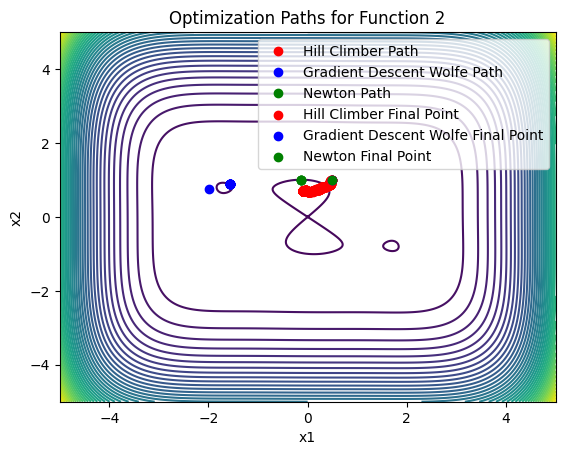

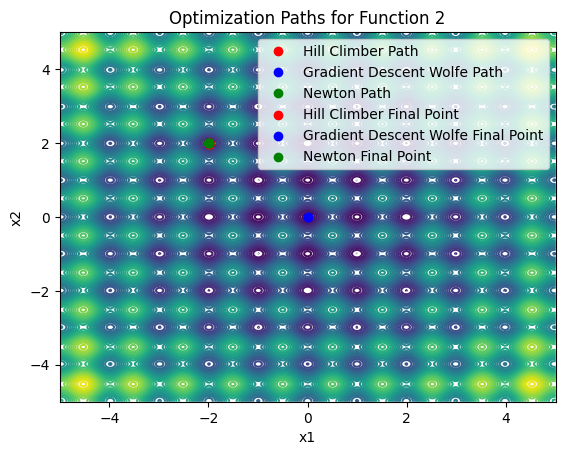

     Function                  Method  Iterations  Function Evals  \
0  Function 1            Hill Climber           1            1001   
1  Function 2            Hill Climber           1            1001   
2   Rastrigin            Hill Climber           1            1001   
3  Function 1                  Newton           1               3   
4  Function 2                  Newton           1               4   
5   Rastrigin                  Newton           1               4   
6  Function 1  Gradient Descent Wolfe           1             421   
7  Function 2  Gradient Descent Wolfe           1             387   
8   Rastrigin  Gradient Descent Wolfe           1              24   

   Gradient Evals  Hessian Evals  Final Error (2-norm)  
0               0              0          7.946952e+00  
1               0              0          7.178612e-01  
2               0              0          2.814217e+00  
3               3              3          0.000000e+00  
4               4       

In [6]:
# Define the functions
def func1(x1, x2):
    return -2*x1**2 + 3*x1*x2 - 1.5*x2**2 - 1.3

def func2(x1, x2):
    return np.clip((4 - 2.1*x1**2 + x1**4 / 3) * x1**2 + x1*x2 + (-4 + 4*x2**2) * x2**2, -1e10, 1e10)

def rastrigin_2d(x1, x2, A=10):
    return A * 2 + (x1**2 - A * np.cos(2 * np.pi * x1)) + (x2**2 - A * np.cos(2 * np.pi * x2))

# Define the gradients
def grad_func1(x1, x2):
    df_dx1 = -4*x1 + 3*x2
    df_dx2 = 3*x1 - 3*x2
    return np.array([df_dx1, df_dx2])

def grad_func2(x1, x2):
    df_dx1 = (8*x1 - 4.2*x1**3 + 4*x1**3) + x2
    df_dx2 = x1 + (8*x2**3 - 8*x2)
    return np.array([df_dx1, df_dx2])

def grad_rastrigin_2d(x1, x2, A=10):
    grad_x1 = 2*x1 + 2 * np.pi * A * np.sin(2 * np.pi * x1)
    grad_x2 = 2*x2 + 2 * np.pi * A * np.sin(2 * np.pi * x2)
    return np.array([grad_x1, grad_x2])

# Define the Hessians
def hess_func1(x1, x2):
    d2f_dx1x1 = -4
    d2f_dx1x2 = 3
    d2f_dx2x1 = 3
    d2f_dx2x2 = -3
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

def hess_func2(x1, x2):
    d2f_dx1x1 = 8 - 12.6*x1**2 + 12*x1**2
    d2f_dx1x2 = 1
    d2f_dx2x1 = 1
    d2f_dx2x2 = 24*x2**2 - 8
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

def hess_rastrigin_2d(x1, x2, A=10):
    hess_x1x1 = 2 + 4 * np.pi**2 * A * np.cos(2 * np.pi * x1)
    hess_x2x2 = 2 + 4 * np.pi**2 * A * np.cos(2 * np.pi * x2)
    hess_x1x2 = 0
    hess_x2x1 = 0
    return np.array([[hess_x1x1, hess_x1x2], [hess_x2x1, hess_x2x2]])

# Starting points
x0_func1 = [-4, 4]
x0_func2 = [0.5, 1]
x0_rastrigin = [-2, 2]

# True optimal values (if known)
true_min_func1 = np.array([0, 0])
true_min_func2 = np.array([0, 0])  # Assumed, depending on the function specifics
true_min_rastrigin = np.array([0, 0])

# Initialize results dictionary
results = {
    'Function': [],
    'Method': [],
    'Iterations': [],
    'Function Evals': [],
    'Gradient Evals': [],
    'Hessian Evals': [],
    'Final Error (2-norm)': []
}

# Test Hill Climber
print("Testing Hill Climber Method:")
hc_result_func1, _, hc_path_func1, hc_func_evals_func1 = hill_climber(func1, x0_func1)
hc_result_func2, _, hc_path_func2, hc_func_evals_func2 = hill_climber(func2, x0_func2)
hc_result_rastrigin, _, hc_path_rastrigin, hc_func_evals_rastrigin = hill_climber(rastrigin_2d, x0_rastrigin)

# Test Gradient Descent with Wolfe Conditions
print("Testing Gradient Descent with Wolfe Conditions:")
gd_result_func1, _, gd_path_func1, gd_func_evals_func1, gd_grad_evals_func1 = gradient_descent_wolfe(func1, grad_func1, x0_func1)
gd_result_func2, _, gd_path_func2, gd_func_evals_func2, gd_grad_evals_func2 = gradient_descent_wolfe(func2, grad_func2, x0_func2)
gd_result_rastrigin, _, gd_path_rastrigin, gd_func_evals_rastrigin, gd_grad_evals_rastrigin = gradient_descent_wolfe(rastrigin_2d, grad_rastrigin_2d, x0_rastrigin)

# Test Newton's Method
print("Testing Newton's Method:")
newton_result_func1, _, newton_path_func1, newton_func_evals_func1, newton_grad_evals_func1, newton_hess_evals_func1 = newton_method(func1, grad_func1, hess_func1, x0_func1)
newton_result_func2, _, newton_path_func2, newton_func_evals_func2, newton_grad_evals_func2, newton_hess_evals_func2 = newton_method(func2, grad_func2, hess_func2, x0_func2)
newton_result_rastrigin, _, newton_path_rastrigin, newton_func_evals_rastrigin, newton_grad_evals_rastrigin, newton_hess_evals_rastrigin = newton_method(rastrigin_2d, grad_rastrigin_2d, hess_rastrigin_2d, x0_rastrigin)


# Visualization for Function 1
x1_vals = np.linspace(min(hc_path_func1[:, 0].min(), gd_path_func1[:, 0].min(), newton_path_func1[:, 0].min()) - 10, 10, 400)
x2_vals = np.linspace(-10, max(hc_path_func1[:, 1].max(), gd_path_func1[:, 1].max(), newton_path_func1[:, 1].max()) + 10, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = func1(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_func1[:, 0], hc_path_func1[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_func1[:, 0], gd_path_func1[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_func1[:, 0], newton_path_func1[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_func1[0], hc_result_func1[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_func1[0], gd_result_func1[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_func1[0], newton_result_func1[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Visualization for Function 2
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = func2(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_func2[:, 0], hc_path_func2[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_func2[:, 0], gd_path_func2[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_func2[:, 0], newton_path_func2[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_func2[0], hc_result_func2[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_func2[0], gd_result_func2[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_func2[0], newton_result_func2[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Visualization for Rastrigin
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = rastrigin_2d(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_rastrigin[:, 0], hc_path_rastrigin[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_rastrigin[:, 0], gd_path_rastrigin[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_rastrigin[:, 0], newton_path_rastrigin[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_rastrigin[0], hc_result_rastrigin[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_rastrigin[0], gd_result_rastrigin[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_rastrigin[0], newton_result_rastrigin[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Store results in the results dictionary
methods = ['Hill Climber', 'Newton', 'Gradient Descent Wolfe']
functions = ['Function 1', 'Function 2', 'Rastrigin']
results_list = [
    (hc_result_func1, hc_func_evals_func1, 0, 0, true_min_func1, 'Function 1', 'Hill Climber'),
    (hc_result_func2, hc_func_evals_func2, 0, 0, true_min_func2, 'Function 2', 'Hill Climber'),
    (hc_result_rastrigin, hc_func_evals_rastrigin, 0, 0, true_min_rastrigin, 'Rastrigin', 'Hill Climber'),
    (newton_result_func1, newton_func_evals_func1, newton_grad_evals_func1, newton_hess_evals_func1, true_min_func1, 'Function 1', 'Newton'),
    (newton_result_func2, newton_func_evals_func2, newton_grad_evals_func2, newton_hess_evals_func2, true_min_func2, 'Function 2', 'Newton'),
    (newton_result_rastrigin, newton_func_evals_rastrigin, newton_grad_evals_rastrigin, newton_hess_evals_rastrigin, true_min_rastrigin, 'Rastrigin', 'Newton'),
    (gd_result_func1, gd_func_evals_func1, gd_grad_evals_func1, 0, true_min_func1, 'Function 1', 'Gradient Descent Wolfe'),
    (gd_result_func2, gd_func_evals_func2, gd_grad_evals_func2, 0, true_min_func2, 'Function 2', 'Gradient Descent Wolfe'),
    (gd_result_rastrigin, gd_func_evals_rastrigin, gd_grad_evals_rastrigin, 0, true_min_rastrigin, 'Rastrigin', 'Gradient Descent Wolfe')
]

for result, func_evals, grad_evals, hess_evals, true_min, func_name, method_name in results_list:
    results['Function'].append(func_name)
    results['Method'].append(method_name)
    results['Iterations'].append(len(result) - 1)
    results['Function Evals'].append(func_evals)
    results['Gradient Evals'].append(grad_evals)
    results['Hessian Evals'].append(hess_evals)
    results['Final Error (2-norm)'].append(compute_error(result, true_min))

# Convert results dictionary to a DataFrame for easy comparison
df_results = pd.DataFrame(results)
print(df_results)

# You can export the results to a CSV file if needed
df_results.to_csv('optimization_results.csv', index=False)
